In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load datasets
payment_info = pd.read_csv("payment_information.csv")
industry_client_details = pd.read_csv("industry_client_details.csv")
subscription_info = pd.read_csv("subscription_information.csv")
financial_info = pd.read_csv("finanical_information.csv")

In [ ]:

# Question 1: Count of Finance Lending and Blockchain clients
finance_blockchain_clients = industry_client_details[
    industry_client_details["industry"].isin(["Finance Lending", "Block Chain"])
].groupby("industry")["client_id"].nunique()


<ipython-input-15-3fac38ec99cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=finance_blockchain_clients.index, y=finance_blockchain_clients.values, palette="coolwarm")


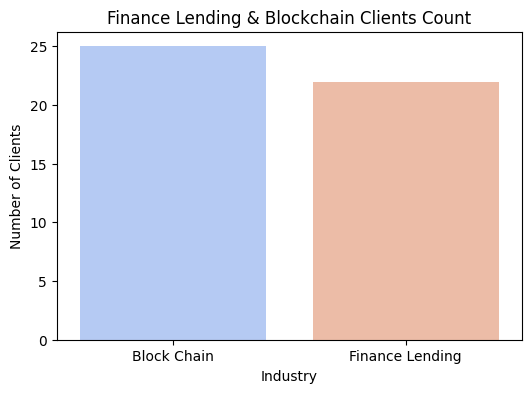

In [ ]:
# Visualization for Question 1
plt.figure(figsize=(6,4))
sns.barplot(x=finance_blockchain_clients.index, y=finance_blockchain_clients.values, palette="coolwarm")
plt.xlabel("Industry")
plt.ylabel("Number of Clients")
plt.title("Finance Lending & Blockchain Clients Count")
plt.show()

In [ ]:
print("Finance Lending Clients:", finance_blockchain_clients["Finance Lending"], "\nBlock Chain Clients:", finance_blockchain_clients["Block Chain"])


Finance Lending Clients: 22 
Block Chain Clients: 25


In [ ]:
# Question 2: Industry with the highest renewal rate
renewal_rates = (
    subscription_info[subscription_info["renewed"] == True]
    .merge(industry_client_details, on="client_id", how="left")
    .groupby("industry")["client_id"]
    .count()
)
industry_highest_renewal = renewal_rates.idxmax()

<ipython-input-18-b50fb1722940>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=renewal_rates.index, y=renewal_rates.values, palette="viridis")


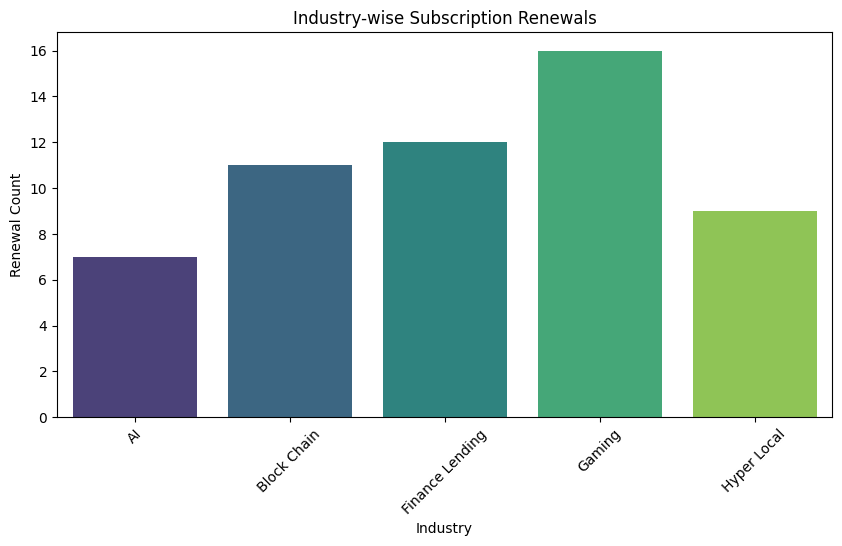

In [ ]:
# Visualization for Question 2
plt.figure(figsize=(10,5))
sns.barplot(x=renewal_rates.index, y=renewal_rates.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Industry")
plt.ylabel("Renewal Count")
plt.title("Industry-wise Subscription Renewals")
plt.show()

In [ ]:
print("Industry with highest renewal rate:", industry_highest_renewal)


Industry with highest renewal rate: Gaming


In [ ]:
# Question 3: Average inflation rate when subscriptions were renewed
subscription_info["end_date"] = pd.to_datetime(subscription_info["end_date"])
financial_info["start_date"] = pd.to_datetime(financial_info["start_date"])
financial_info["end_date"] = pd.to_datetime(financial_info["end_date"])

renewed_subs = subscription_info[subscription_info["renewed"] == True]
inflation_at_renewal = pd.merge_asof(
    renewed_subs.sort_values("end_date"),
    financial_info.sort_values("start_date"),
    left_on="end_date",
    right_on="start_date",
    direction="backward"
)["inflation_rate"].mean()

In [ ]:
print("Average inflation rate at renewal:", round(inflation_at_renewal, 2))


Average inflation rate at renewal: 4.42


In [ ]:
# Question 4: Median amount paid each year for all payment methods
payment_info["payment_date"] = pd.to_datetime(payment_info["payment_date"])
payment_info["year"] = payment_info["payment_date"].dt.year
median_amount_paid_per_year = payment_info.groupby("year")["amount_paid"].median()

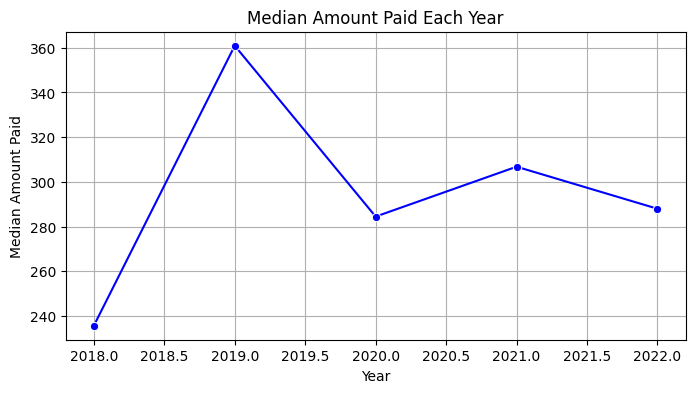

In [ ]:
# Visualization for Question 4
plt.figure(figsize=(8,4))
sns.lineplot(x=median_amount_paid_per_year.index, y=median_amount_paid_per_year.values, marker="o", color="b")
plt.xlabel("Year")
plt.ylabel("Median Amount Paid")
plt.title("Median Amount Paid Each Year")
plt.grid(True)
plt.show()

In [ ]:
print("Median amount paid per year:")
print(median_amount_paid_per_year)

Median amount paid per year:
year
2018    235.7
2019    360.9
2020    284.5
2021    306.8
2022    288.0
Name: amount_paid, dtype: float64
